In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn import linear_model

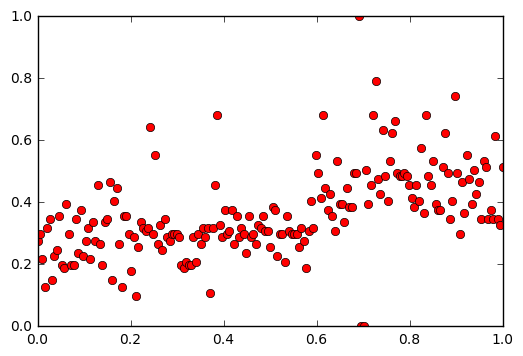

In [2]:
f = open('bread.doc', 'r')
str = f.read()
ar = str.split('\n')
res = []
for x in ar:
    a = x.split(',')
    try:
        res.append(np.array((float(a[0]),float(a[1]))))
    except ValueError:
       pass 
n = np.array(res)
x =n[:,1]
y=n[:,0]
plt.plot(x, y, 'ro')
plt.show()

In [7]:
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))
print('Coefficients: \n', regr.coef_)

('Coefficients: \n', array([[ 0.25181821]]))


In [3]:
A = np.ones((x.size,2))
i = 0
for t in x:
    A[i,1] = t
    i = i+1

In [4]:
Ai = inv(np.dot(A.transpose(),A))

In [5]:
coefs = np.dot(np.dot(Ai,A.transpose()),y)

In [6]:
coefs

array([ 0.2385997 ,  0.25181821])

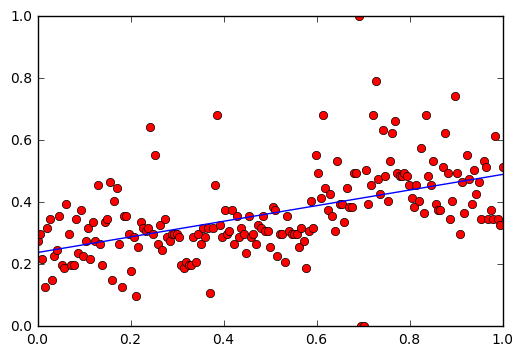

2.73203221101


In [7]:
def f(x):
    return coefs[0]+coefs[1]*x

plt.plot(x, y, 'ro',
        x,f(x),'b')
plt.show()

r=y-f(x)
r
sse = np.dot(r.transpose(),r)
print sse

In [130]:
ff = open('bread_space.txt', 'w')
ff.write(str.replace(","," "))
ff.close()

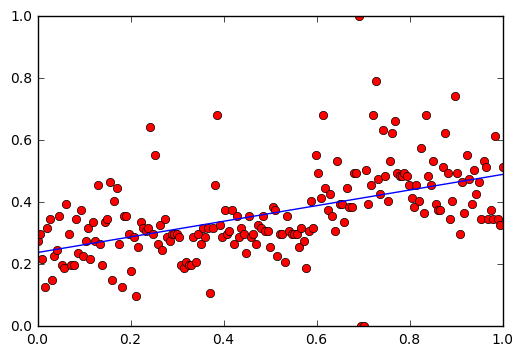

2.73203221101


In [10]:
def f(x):
    return 0.23859969831649413541+0.25181821443274232664*x

plt.plot(x, y, 'ro',
        x,f(x),'b')
plt.show()

r=y-f(x)
r
sse = np.dot(r.transpose(),r)
print sse

In [87]:
f = open('cpu_act.features', 'r')
str = f.read()
ar = str.split('\n')
res = []
goals = []
for x in ar:
    a = np.array(x.split('	'))
    goals.append(a)
Y = np.array(goals)
Y = np.delete(Y,8192)

In [109]:
def ch(m,s, L, D):
    for j in np.arange(0,s):
        sum = 0
        for k in np.arange(0,j):
            sum = sum + L[j,k]*L[j,k]*D[k,k]
        D[j,j] = m[j,j] - sum
        L[j,j] = 1
        for i in np.arange(j+1,s):
            sum = 0
            for k in np.arange(0,j):
                sum = sum + L[i,k]*L[j,k]*D[k,k]
            L[i,j]=(m[i,j] - sum)/D[j,j]
        

In [88]:
res = []
for x in Y:
    res.append(x.astype(float))
Y = np.array(res)

In [95]:
goals = Y[:,1]
matr = np.delete(Y, [0,1,2,3], axis=1)

In [127]:
A = matr
y = goals
size = A[1].size
fsize = A[:,1].size

In [133]:
M = np.empty([size, size], dtype=float)
for i in np.arange(0,size):
    for j in np.arange(0,size):
        x1 = 0
        x2 = 0
        x3 = 0
        for k in np.arange(0,fsize):
            x3 = x3 + A[k,i]*A[k,j]
            x1 = x1 + A[k,i]
            x2 = x2 + A[k,j]
        M[i,j] = x3 - x1*x2/size
        
for i in np.arange(0,size):
    M[i,i] = M[i,i]
    
L = np.zeros([size, size], dtype=float)
D = np.zeros([size, size], dtype=float)
ch(M,size,L,D)

yy = np.empty([size], dtype=float)
for i in np.arange(0,size):
    x1 = 0
    x2 = 0
    x3 = 0
    for k in np.arange(0,fsize):
        x3 = x3 + A[k,i]*y[k]
        x1 = x1 + A[k,i]
        x2 = x2 + y[k]
    yy[i] = x3 - x1*x2/size
yy

coefs = np.dot(np.linalg.inv(np.dot(D,L.transpose())),np.dot(np.linalg.inv(L),yy))

my=0
for x in np.arange(0,fsize):
    my = my + (y[x] - my)/(x+1)
b = 0
for x in coefs:    
    b = b + x
b = my - b
print b

88.8418080812


In [134]:
coefs

array([ -3.00743468e-02,   4.53056926e-02,   2.92282171e-03,
         6.73461122e-03,  -2.58587134e-03,  -5.77835099e+00,
         4.12261169e-01,  -4.89305410e-06,   8.63732258e-07,
         5.53594517e-01,  -1.31688492e-01,  -1.02339221e-01,
         1.78207747e-02,   4.17128097e-03,   1.37812201e-01,
        -2.00152561e-02,  -6.10387837e-02,   8.35712741e-02,
        -9.00719470e-03,  -2.08741875e-03,   6.12531272e-05])

In [62]:
f = open('puma32H.features', 'r')
str = f.read()
ar = str.split('\n')
res = []
goals = []
for x in ar:
    a = np.array(x.split('	'))
    goals.append(a)
Y = np.array(goals)

res = []
for x in Y:
    try:
        res.append(x.astype(float))
    except ValueError:
        pass
Y = np.array(res)
goals = Y[:,1]
features = np.delete(Y, [0,1,2,3], axis=1)

regr = linear_model.LinearRegression()
regr.fit(features, goals.reshape(-1, 1))
coefs = regr.coef_[0]
inter = regr.intercept_[0]

SSE=0
for i in np.arange(0,goals.size):
    prediction=0
    for j in np.arange(0,features[i].size):
        prediction += features[i][j] * coefs[j]
    prediction += inter
    SSE+= (prediction - goals[i])*(prediction - goals[i])
    
SSE

5.8288266996378439